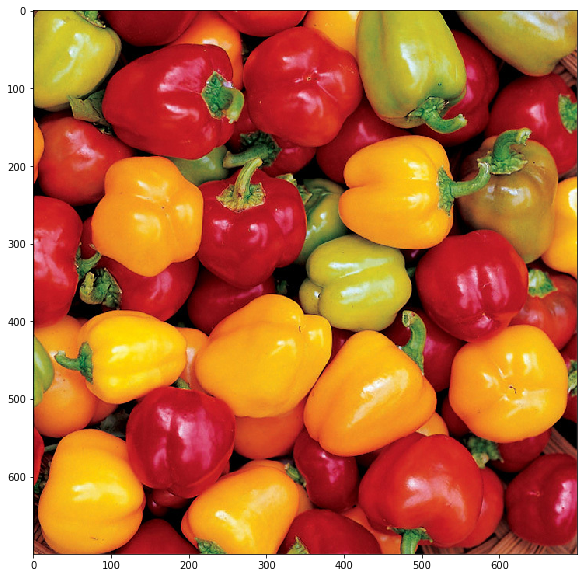

In [16]:
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt

image = imread('peppers.jpg')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)


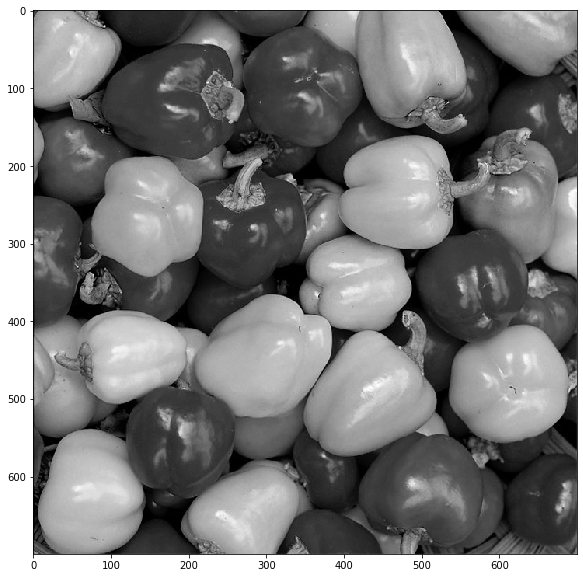

In [17]:
from skimage.color import rgb2gray

image = rgb2gray(image)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image, cmap='gray')

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(image.reshape(-1, 1))
print(kmeans.cluster_centers_)
np.savetxt('colors.txt', kmeans.cluster_centers_, fmt='%1.3f')

[[0.81797452]
 [0.2398536 ]
 [0.60688336]
 [0.35342666]
 [0.03884599]
 [0.71039215]
 [0.4875909 ]
 [0.15724692]]


In [74]:
from numpy.linalg import norm

def get_ratio(candidate, x, y, i, j):
    regularizer = norm(x[i, j] - x[i - 1, j]) + norm(x[i, j] - x[i + 1, j]) + norm(x[i, j] - x[i, j - 1]) + norm(x[i, j] - x[i, j + 1])
    data_consistency = norm(x[i, j] - y[i, j])
    u_denominator = 1 * data_consistency + 0 * regularizer

    regularizer = norm(candidate - x[i - 1, j]) + norm(candidate - x[i + 1, j]) + norm(candidate - x[i, j - 1]) + norm(candidate - x[i, j + 1])
    data_consistency = norm(candidate - y[i, j])
    u_numerator = 1 * data_consistency + 0 * regularizer

    #return np.exp(-u_numerator) / np.exp(-u_denominator)
    return u_denominator - u_numerator

In [75]:
def update_temp(r):
    return np.power(0.99, np.exp(8 * r))

1002517


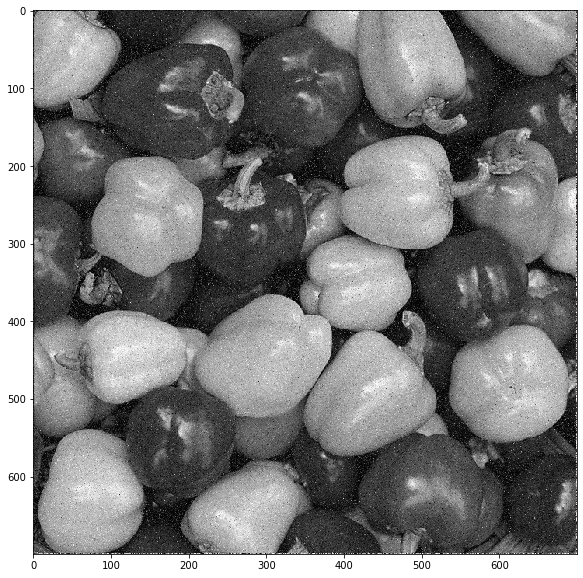

In [76]:
from numpy.random import rand, randint

h = image.shape[0]
w = image.shape[1]
x = rand(h, w)
y = image
T = 4
count = 0
iterations = 10000000

for iter in range(iterations):
    row = randint(1, h - 1)
    col = randint(1, w - 1)
    candidate = rand()
    value = get_ratio(candidate, x, y, row, col)
    #p = min(1, value)
    p = np.exp(min(0, value) / T)
    if rand() < p:
        count += 1
        x[row, col] = candidate
    T *= update_temp(iter / iterations)

print(count)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(x, cmap='gray')